In [2]:
# 추가되는 패키지는 여기에서 import 해주세요
import warnings
warnings.filterwarnings('ignore')
import missingno
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from itertools import count
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)
# matplotlib 설정
mpl.use('Agg')
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 100)

In [4]:
# 데이터 load
train = pd.read_csv('train.csv',date_parser='date')
train.tail()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415422,415422,2019-09-30,32820000,시내,6115100,서귀포시외버스터미널,33.24873,126.50799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


### 데이터 전처리

In [6]:
# 분석을 위해 컬럼명 수정
train.rename(columns={'6~7_ride': 'ride6', '7~8_ride': 'ride7', '8~9_ride': 'ride8',\
                      '9~10_ride': 'ride9', '10~11_ride': 'ride10', '11~12_ride': 'ride11', 
                      '6~7_takeoff': 'off6', '7~8_takeoff': 'off7', '8~9_takeoff': 'off8', \
                      '9~10_takeoff': 'off9', '10~11_takeoff': 'off10', '11~12_takeoff': 'off11',\
                      '18~20_ride': 'ride18'},inplace=True)
train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,ride8,ride9,ride10,ride11,off6,off7,off8,off9,off10,off11,ride18
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 시작 날짜와, 끝 날짜 확인
print(train['date'].min())
print(train['date'].max())
# date 타입 변경
train['date'] = train['date'].astype('datetime64')
# 9월 1일 ~ 9월 30일 데이터이니까, day만 따로 가져옴
train['date_day'] = train['date'].dt.day
# 월(0) ~ 일(6) 데이터로 변환
train['date_dayofweek'] = train['date'].dt.dayofweek
train['date_dayofname']= train['date'].dt.day_name()
train[['date','date_dayofweek','date_day','date_dayofname']]

2019-09-01
2019-09-30


,date,date_dayofweek,date_day,date_dayofname
0,2019-09-01,6,1,Sunday
1,2019-09-01,6,1,Sunday
2,2019-09-01,6,1,Sunday
3,2019-09-01,6,1,Sunday
4,2019-09-01,6,1,Sunday
...,...,...,...,...
415418,2019-09-30,0,30,Monday
415419,2019-09-30,0,30,Monday
415420,2019-09-30,0,30,Monday
415421,2019-09-30,0,30,Monday


In [8]:
#평일과 휴일을 나누기, 금토일 =1, 나머지는 0
train.loc[train['date_dayofweek'] == 0, 'holiday' ] = 0
train.loc[train['date_dayofweek'] == 1, 'holiday' ] = 0
train.loc[train['date_dayofweek'] == 2, 'holiday' ] = 0
train.loc[train['date_dayofweek'] == 3, 'holiday' ] = 0
train.loc[train['date_dayofweek'] == 4, 'holiday' ] = 1
train.loc[train['date_dayofweek'] == 5, 'holiday' ] = 1
train.loc[train['date_dayofweek'] == 6, 'holiday' ] = 1
# 추석 추가도 공휴일로 처리
train.loc[train['date'] == '2019-09-14', 'holiday'] = 1
train.loc[train['date'] == '2019-09-13', 'holiday'] = 1
train.loc[train['date'] == '2019-09-12', 'holiday'] = 1

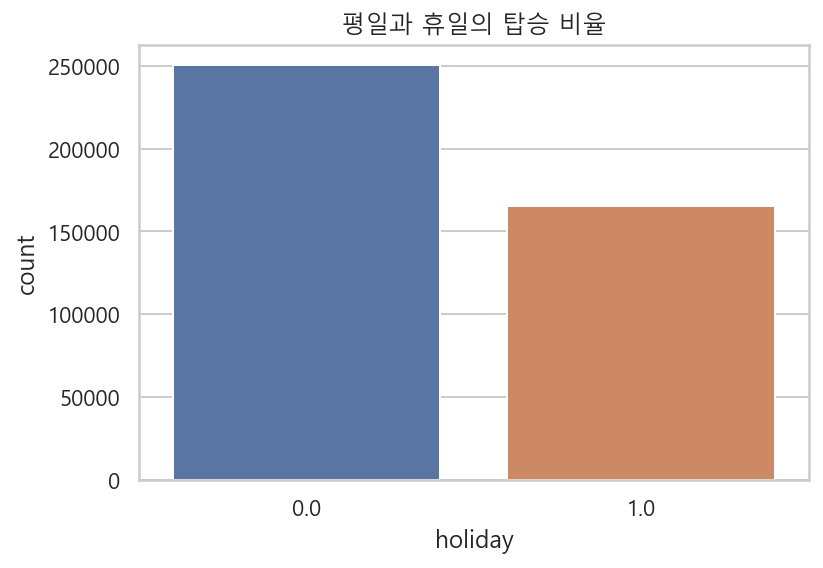

In [9]:
sns.countplot(data=train, x= 'holiday')
plt.title('평일과 휴일의 탑승 비율')
plt.show()

In [10]:
# 평일과 공휴일의 비율 (6:4)
train['holiday'].value_counts() / train['holiday'].value_counts().sum() * 100

0.0    60.242211
1.0    39.757789
Name: holiday, dtype: float64

In [11]:
# 시내와 시외를 int형으로 원핫인코딩
train.loc[train['in_out'] == '시외','in_out'] = 1
train.loc[train['in_out'] == '시내','in_out'] = 0
train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,ride8,ride9,ride10,ride11,off6,off7,off8,off9,off10,off11,ride18,date_day,date_dayofweek,date_dayofname,holiday
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6,Sunday,1.0
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,6,Sunday,1.0
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,6,Sunday,1.0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1,6,Sunday,1.0
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,6,Sunday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0
415419,415419,2019-09-30,32820000,0,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0
415420,415420,2019-09-30,32820000,0,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0
415421,415421,2019-09-30,32820000,0,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0


In [12]:
# 한달에 30번이하로 운행하는 정류소 갯수
(train['station_code'].value_counts().sort_values(ascending = True) <= 29).sum()

1219

In [13]:
# 한달에 30회 미만 운행하는 정류장구하기
outlier = pd.DataFrame(train['station_code'].value_counts().sort_values(ascending = True)).reset_index()
outlier.columns = ['station_code', 'times']
outlier = outlier[outlier['times'] <= 29]
outlier

,station_code,times
0,3122,1
1,3247,1
2,2684,1
3,6115016,1
4,1324,1
...,...,...
1214,2483,29
1215,985,29
1216,698,29
1217,4173,29


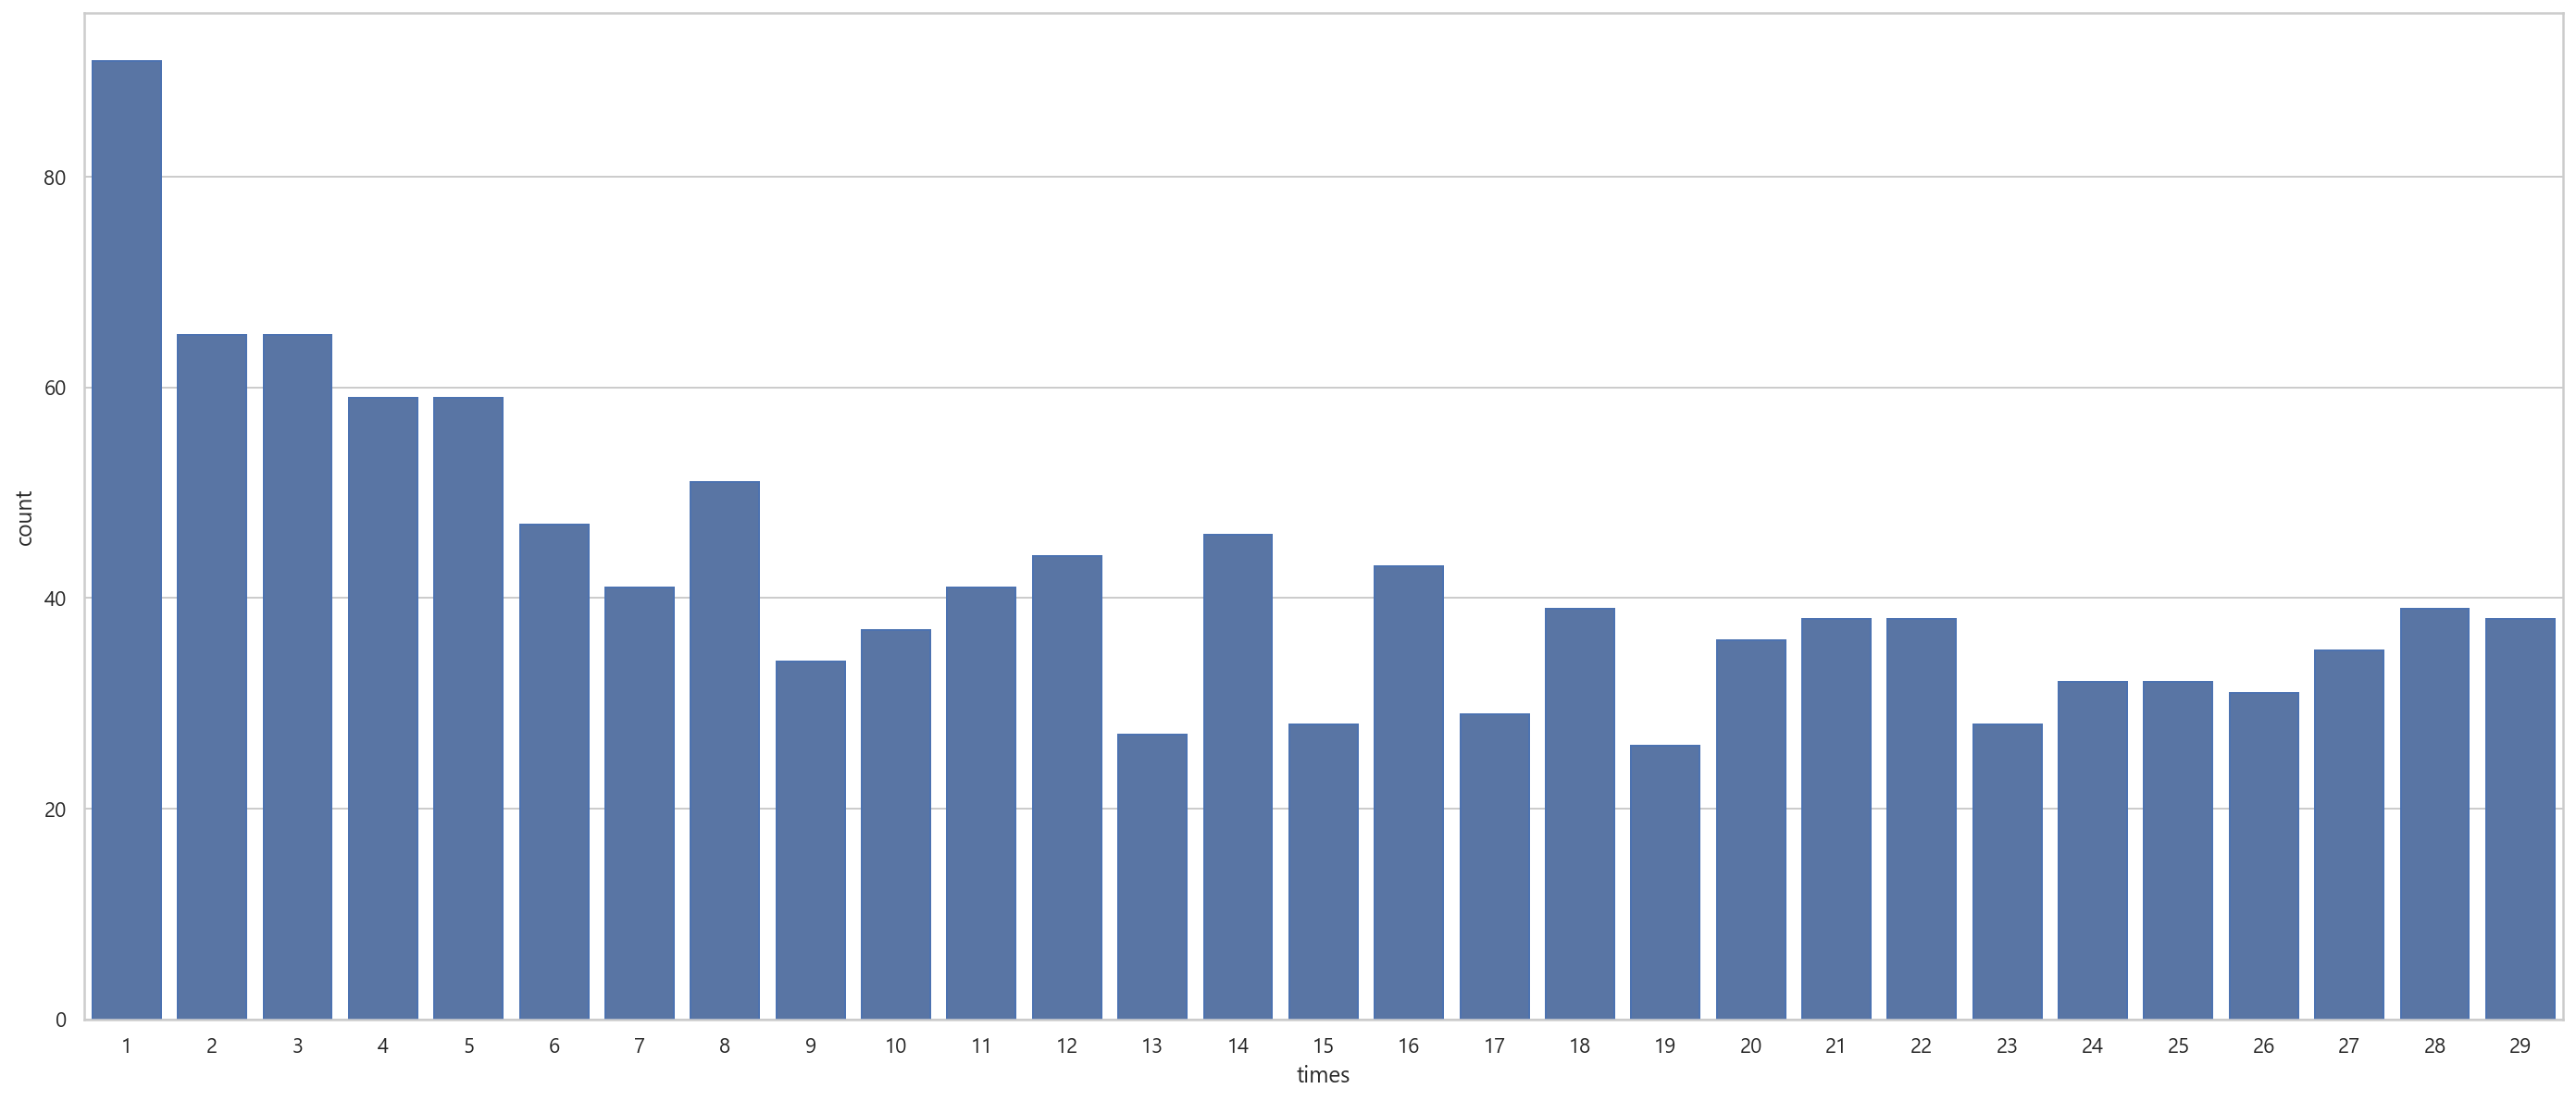

In [14]:
# 한달에 30번 미만 운행하는 정류장의 count플롯
plt.figure(figsize=(24,10))
sns.countplot(x ='times', data = outlier,edgecolor='b', color='b')
plt.show()

In [15]:
# 한달에 30번 미만 운행하는 정류소는 아웃라이어로 삭제
train_test = train.copy()
for i in outlier['station_code'] :
    train_test = train_test[train_test['station_code'] != i]
train_test

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,ride8,ride9,ride10,ride11,off6,off7,off8,off9,off10,off11,ride18,date_day,date_dayofweek,date_dayofname,holiday
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6,Sunday,1.0
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,6,Sunday,1.0
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,6,Sunday,1.0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1,6,Sunday,1.0
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,6,Sunday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0
415419,415419,2019-09-30,32820000,0,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0
415420,415420,2019-09-30,32820000,0,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0
415421,415421,2019-09-30,32820000,0,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0


## 데이터 분리 후 모델 학습 및 검증

In [16]:
# 9월 1일 ~ 9월 21일 = train
# 9월 22일 ~ 9월 30일 = test
# 학습 및 검증은 train으로하고 test는 실제 모델에 사용해봄
df_train = train_test[train_test['date']  <= '2019-09-21']
df_test = train_test[train_test['date']  >= '2019-09-22']

In [17]:
# test와 train의 비율 및 정류소의 갯수 (둘다 동일하게 들어갔는지.)
print('train의 비율:', len(df_train) / len(train_test))
print('test의 비율:', len(df_test) / len(train_test))
print('전체의 정류소 갯수:', len(train_test['station_code'].unique()))
print('train의 정류소 갯수:', len(df_train['station_code'].unique()))
print('test의 정류소 갯수:', len(df_test['station_code'].unique()))
print('train의 노선 갯수:', len(df_train['bus_route_id'].unique()))
print('test의 노선 갯수:', len(df_test['bus_route_id'].unique()))

train의 비율: 0.696178865247872
test의 비율: 0.3038211347521281
전체의 정류소 갯수: 2344
train의 정류소 갯수: 2344
test의 정류소 갯수: 2344
train의 노선 갯수: 601
test의 노선 갯수: 578


In [18]:
# 한달에 비정기적으로 운행하는 노선 확인(1)
y = list(set(df_train['bus_route_id'].unique()) - set(df_test['bus_route_id'].unique()))
print(len(y))
y

31


[31040000,
 28640000,
 28800000,
 27600000,
 28730000,
 29370000,
 32010000,
 31060000,
 29940000,
 31220000,
 31380000,
 27860000,
 21860000,
 29620000,
 27140000,
 23630000,
 21550000,
 21160000,
 21720000,
 29480000,
 21800000,
 29170000,
 29570000,
 28850000,
 32770000,
 30210000,
 28780000,
 30710000,
 30950000,
 29990000,
 21590000]

In [19]:
# 비정기적으로 운행하는 노선 삭제
df_train = df_train.copy()
for i in y :
    df_train = df_train[df_train['bus_route_id'] != i]
df_train

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,ride8,ride9,ride10,ride11,off6,off7,off8,off9,off10,off11,ride18,date_day,date_dayofweek,date_dayofname,holiday
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6,Sunday,1.0
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,6,Sunday,1.0
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,6,Sunday,1.0
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1,6,Sunday,1.0
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,6,Sunday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289005,289005,2019-09-21,32820000,0,1129,한림환승정류장(한림리),33.41437,126.26336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,5,Saturday,1.0
289006,289006,2019-09-21,32820000,0,1564,제주시외버스터미널,33.49946,126.51479,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,5,Saturday,1.0
289007,289007,2019-09-21,32820000,0,2970,제주시외버스터미널(종점),33.49993,126.51414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21,5,Saturday,1.0
289008,289008,2019-09-21,32820000,0,2972,제주국제공항(종점),33.50571,126.49319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,21,5,Saturday,1.0


In [20]:
# 한달에 비정기적으로 운행하는 노선 확인(2)
y = list(set(df_test['bus_route_id'].unique()) - set(df_train['bus_route_id'].unique()))
print(len(y))
y

8


[27040000,
 30080000,
 23540000,
 31120000,
 30360000,
 21790000,
 29550000,
 32090000]

In [21]:
# 비정기적으로 운행하는 노선 삭제
df_test = df_test.copy()
for i in y :
    df_test = df_test[df_test['bus_route_id'] != i]
df_test

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,ride6,ride7,ride8,ride9,ride10,ride11,off6,off7,off8,off9,off10,off11,ride18,date_day,date_dayofweek,date_dayofname,holiday
289010,289010,2019-09-22,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22,6,Sunday,1.0
289011,289011,2019-09-22,4270000,1,357,한라병원,33.48944,126.48508,0.0,2.0,5.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22,6,Sunday,1.0
289012,289012,2019-09-22,4270000,1,432,정존마을,33.48181,126.47352,1.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,6,Sunday,1.0
289013,289013,2019-09-22,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,1.0,0.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22,6,Sunday,1.0
289014,289014,2019-09-22,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22,6,Sunday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0
415419,415419,2019-09-30,32820000,0,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0
415420,415420,2019-09-30,32820000,0,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0
415421,415421,2019-09-30,32820000,0,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0,Monday,0.0


In [22]:
# test와 train의 비율 및 정류소의 갯수 (둘다 동일하게 들어갔는지.)
print('train의 비율:', len(df_train) / len(train_test))
print('test의 비율:', len(df_test) / len(train_test))
print('전체의 정류소 갯수:', len(train_test['station_code'].unique()))
print('train의 정류소 갯수:', len(df_train['station_code'].unique()))
print('test의 정류소 갯수:', len(df_test['station_code'].unique()))
print('train의 노선 갯수:', len(df_train['bus_route_id'].unique()))
print('test의 노선 갯수:', len(df_test['bus_route_id'].unique()))

train의 비율: 0.6952978542877952
test의 비율: 0.30367096242938774
전체의 정류소 갯수: 2344
train의 정류소 갯수: 2344
test의 정류소 갯수: 2344
train의 노선 갯수: 570
test의 노선 갯수: 570


In [23]:
# 테스트 데이터 프레임 나누기
# 간략화 하기 위해 데이터 프레임에서 정류장코드 몇개만 가져오기

def split(num, seed):
    test_frame = pd.DataFrame(columns=df_train.columns)
    np.random.seed(seed)

    for i in np.random.choice(df_train['station_code'].unique(), num, replace=False):
        df1 = df_train[df_train['station_code'] == i]
        test_frame = pd.concat([test_frame, df1])
    return test_frame

# 모델 돌리기
def ols_trian_test(test_frame, seed, var, cate):
    np.random.seed(seed)
    columns = test_frame.columns
    df_tr = pd.DataFrame(columns=columns)
    df_te = pd.DataFrame(columns=columns)
    df_tr['yhat'] = 999
    df_te['yhat'] = 999

    # 데이터를 받아, 스테이션 코드 1개만 출력하여 
    for i in test_frame['station_code'].unique():
        # df1로 저장
        df1 = test_frame[test_frame['station_code'] == i]
        # df1을 id 갯수로 피벗테이블 변경
        table = df1.pivot_table(index=['bus_route_id'], values=['id'], aggfunc=len).reset_index()
        # 변경된 피벗테이블에서 id의  1(노선이 1개인것과 동일)한것을 table에 저장
        table = table[table['id'] == 1]
        # 데이터라는 빈데이터프레임을 만들고
        data = pd.DataFrame(columns=test_frame.columns)
        # id가 1인 테이블에서 
        for i in table['bus_route_id']:
            # 1인 데이터만 data 프레임에 저장
            data = data.append(df1[df1['bus_route_id'] == i],ignore_index = True)
        # df1과 data 프레임을 합침    
        df1 = pd.concat([df1,data]).reset_index(drop=True)

        # 정류소별로 테스트와 나누기
        # 빈 리스트 2개를 만들고
        ls_idx_1 = []
        ls_idx_2 = []
            # 앞에서 만든 df1의 버스 아이디를 가져와서
        for num in df1["bus_route_id"].unique():
            #df1의 버스 루트아이디의 인덱스를 idx변수에 담고
            idx = df1[df1["bus_route_id"] == num].index
            # idx1과 idx2로 2등분 해줌 (8:2 수준)
            idx_1 = np.random.choice(idx, int(len(idx) *0.7), replace=False)
            idx_2 = df1.loc[idx].drop(axis=1, index=idx_1).index
            # 리스트에 차곡차곡 다 저장
            ls_idx_1 += list(idx_1)
            ls_idx_2 += list(idx_2)
            # 리스트에 저장된 인덱스를 idx_1_df와 2df로 만듬
            idx_1_df = df1.loc[ls_idx_1]
            idx_2_df = df1.loc[ls_idx_2]

            columns = idx_1_df.columns
            cate_c = [f"C({name})" for name in cate]
            # var_s = [f"scale({name})" for name in var]
            y = ['ride18']

            # 모델 학습
        for i in idx_1_df['station_code'].unique():
            sample = idx_1_df[idx_1_df['station_code'] == i]
            sample_model = sample[var+y+cate] # 트레인 모델
            # 모델 포뮬라
            model = sm.OLS.from_formula(
            'ride18  ~ ' + '+'.join(var)
            + '+'.join('+') + '+'.join(cate_c), data=sample_model)
            # 학습
            result = model.fit()
            # 결과
            sample['yhat'] = result.predict(sample_model)
            # 학습 저장
            df_tr = pd.concat([df_tr, sample])
            
            # 테스트 모델 가져오기 
            sample2 = idx_2_df[idx_2_df['station_code'] == i]
            sample2_model = sample2[var+cate] #테스트 모델
            # 테스트 모델 예측
            sample2['yhat'] = result.predict(sample2_model)
            # 테스트 저장
            df_te = pd.concat([df_te, sample2])

#     df_tr.loc[df_tr['yhat'] < 0, 'yhat'] = 0
#     df_tr['yhat'] = round(df_tr['yhat'])
#     df_tr['residual'] = df_tr['ride18'] - df_tr['yhat']
#     df_tr['explained'] = df_tr['yhat'] - df_tr['yhat'].mean()
#     df_tr['total'] = df_tr['ride18'] - df_tr['ride18'].mean()

#     df_te.loc[df_te['yhat'] < 0, 'yhat'] = 0
#     df_te['yhat'] = round(df_te['yhat'])
#     df_te['residual'] = df_te['ride18'] - df_te['yhat']
#     df_te['explained'] = df_te['yhat'] - df_te['yhat'].mean()
#     df_te['total'] = df_te['ride18'] - df_te['ride18'].mean()
    return df_tr, df_te

In [24]:
# 데이터가 많으니, 샘플로 데이터를 뽑음 
test_frame = split(50, 100)

In [25]:
# ols 모델 돌리기
var = ['ride6', 'ride7', 'ride8', 'ride9', 'ride10', 'ride11',
       'off6', 'off7', 'off8', 'off9', 'off10', 'off11']
# var = ['ride67', 'ride89','ride1011','off67','off89','off1011']
cate = ['bus_route_id']

df_tr, df_te = ols_trian_test(test_frame, 50, var, cate)

In [26]:
## R스퀘어 구하기
# df_tr.loc[df_tr['yhat'] < 0, 'yhat'] = 0
# df_tr['yhat'] = round(df_tr['yhat'])
df_tr['residual'] = df_tr['ride18'] - df_tr['yhat']
df_tr['explained'] = df_tr['yhat'] - np.mean(df_tr['yhat'])
df_tr['total'] = df_tr['ride18'] - np.mean(df_tr['ride18'])

# df_te.loc[df_te['yhat'] < 0, 'yhat'] = 0
# df_te['yhat'] = round(df_te['yhat'])
df_te['residual'] = df_te['ride18'] - df_te['yhat']
df_te['explained'] = df_te['yhat'] - np.mean(df_te['yhat'])
df_te['total'] = df_te['ride18'] - np.mean(df_te['ride18'])

train_ess = np.sum((df_tr['explained'] ** 2))
train_rss = np.sum((df_tr['residual'] ** 2))
train_tss = np.sum((df_tr['total'] ** 2))
test_ess = np.sum((df_te['explained'] ** 2))
test_rss = np.sum((df_te['residual'] ** 2))
test_tss = np.sum((df_te['total'] ** 2))

print(f'train_ESS {train_ess} 입니다.')
print(f'train_RSS {train_rss} 입니다.')
print(f'train_TSS {train_tss} 입니다.')
print(f'test_ESS {test_ess} 입니다.')
print(f'test_RSS {test_rss} 입니다.')
print(f'test_TSS {test_tss} 입니다.')

print(f'학습 결정계수는 {1-train_rss/train_tss}, {train_ess/train_tss} 입니다.')
print(f'검증 결정계수는 {1-test_rss/test_tss}, {test_ess/test_tss} 입니다.')
# RMSE 예측값 - y 제곱의 평균의 루트
print('검증 RMSE :',np.sqrt(((df_te['yhat'] - df_te['ride18']) ** 2).mean()))
print('학습 RMSE :',np.sqrt(((df_tr['yhat'] - df_tr['ride18']) ** 2).mean()))

train_ESS 61894.08478652802 입니다.
train_RSS 8066.147990090323 입니다.
train_TSS 69960.23277661795 입니다.
test_ESS 41597.068870994124 입니다.
test_RSS 8061.529791655195 입니다.
test_TSS 35761.84840828701 입니다.
학습 결정계수는 0.8847038142962528, 0.8847038142962584 입니다.
검증 결정계수는 0.7745773736408123, 1.1631688719242748 입니다.
검증 RMSE : 2.018300531311396
학습 RMSE : 1.4508427460697284


### 궁금,해결해야할점

- train에서의 결정계수는 제대로 나오는데, 해당 모델로 test를 돌리면 1 이상의 결정계수를 가져올때가 있음. 이를 위해서 RMSE와 같은 다른 성능평가 지표를 사용하여도 되는지?
- train데이터에서 정류장별로 데이터를 가져오면, 버스노선이 딱 1개의 데이터만 있는 경우가 있어서 이 경우에는 1개의 데이터를 복제하여 train과 test에 각 1개씩 들어가게 하였는데, 이 방법 말고 다른 방법이 있을지. 